In [1]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np

# Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Consistent plot size
from pylab import rcParams
rcParams['figure.figsize'] = (16,8)

# handle unwanted warnings
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

# time series related imports
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pmdarima import auto_arima


In [2]:
# Read in data and display fist 5 rows
df = pd.read_csv('TIME SERIES + VISITOR ATTENTION INDEX + ECONOMIC INDEX - DATA COMPOSITION 3 (90-5-5).csv', index_col="Month", parse_dates=True)
df.head()

,Tourist Arrival,CCI,PMI,REERI,Airbnb Vietnam,Vietnam restaurant,Shopping in Hanoi,Shopping in Ho Chi Minh,Vietnam tour,Skyscanner,...,Hoi An,Vietnam weather,Visa for Vietnam,Sgn airport,Phu Quoc,Vietnam itinerary,Vietnam trip,Things to do in Hue,Vietnam backpackers,Class
Month,,,,,,,,,,,,,,,,,,,,,
2008-01-01,399556,98,53,109,11,59,32,8,58,7,...,27,58,29,18,20,0,32,0,8,Train
2008-01-02,411032,91,53,108,0,51,0,0,46,6,...,27,58,31,10,19,5,39,7,5,Train
2008-01-03,414332,90,53,106,0,57,7,24,58,6,...,27,50,29,38,28,6,30,0,0,Train
2008-01-04,395900,83,56,106,0,51,6,9,58,6,...,27,41,30,25,22,8,45,0,8,Train
2008-01-05,366387,80,57,106,0,57,0,7,57,6,...,27,44,24,16,22,5,47,0,9,Train


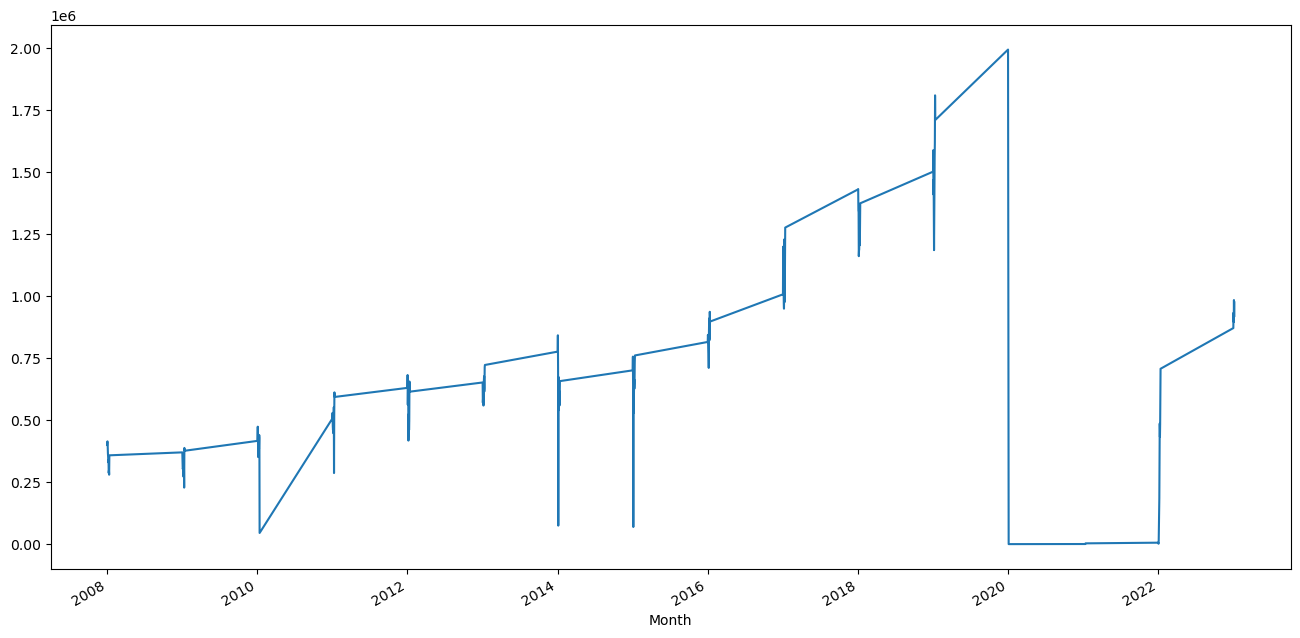

In [3]:
fig, ax = plt.subplots(figsize=(16,8))
ax = df['Tourist Arrival'].plot()
color_arr = ['g', 'r', 'm', 'b', 'y', 'k']
c_indx = 0
for x in df[df['Tourist Arrival']==1].index:
    ax.axvline(x=x, color=color_arr[c_indx], linewidth=0.5)
    if color_arr[c_indx] == 'k':
        c_indx = 0
    else:
        c_indx +=1

In [4]:
df1=df.drop(["Class"], axis=1)
print(df1)

            Tourist Arrival  CCI  PMI  REERI  Airbnb Vietnam  \
Month                                                          
2008-01-01           399556   98   53    109              11   
2008-01-02           411032   91   53    108               0   
2008-01-03           414332   90   53    106               0   
2008-01-04           395900   83   56    106               0   
2008-01-05           366387   80   57    106               0   
...                     ...  ...  ...    ...             ...   
2023-01-02           932969   87   51    132              64   
2023-01-03           895425   82   48    132              65   
2023-01-04           984146   84   47    131              58   
2023-01-05           916257   79   45    131              56   
2023-01-06           975010   84   46    131              63   

            Vietnam restaurant  Shopping in Hanoi  Shopping in Ho Chi Minh  \
Month                                                                        
2008-01-01 

In [5]:
auto_arima(df1['Tourist Arrival'], m=12, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.93 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=4947.042, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=4937.754, Time=0.07 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=4938.437, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=4945.121, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=4948.808, Time=0.03 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=4939.754, Time=0.15 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=4939.754, Time=0.14 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=4938.184, Time=0.06 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=4940.975, Time=0.27 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=4935.707, Time=0.05 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=4937.707, Time=0.13 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=4937.707, Time=0.11 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=4936.131, Time=0.04 sec
 ARIMA(0,1,0)(2,0,1)[12]

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(1, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [6]:
train = df1['Tourist Arrival'][:'01/12/2021'].dropna()
test = df1['Tourist Arrival']['01/01/2022':].dropna()
exog_train = df1.drop(['Tourist Arrival'], axis=1)[:'01/12/2021'].dropna()
exog_test = df1.drop(['Tourist Arrival'], axis=1)['01/01/2022':].dropna()

In [7]:
import statsmodels.api as sm
model = SARIMAX(train,order=(0,1,0),seasonal_order=(1,0,0,12),exog = exog_train,
                                enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()
results.summary()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           24     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20837D+01    |proj g|=  1.02704D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   24      1      3      1     0     0   4.469D-05   1.208D+01
  F =   12.083734418388092     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                    Tourist Arrival   No. Observations:                  168
Model:             SARIMAX(0, 1, 0)x(1, 0, 0, 12)   Log Likelihood               -2030.067
Date:                            Wed, 23 Aug 2023   AIC                           4108.135
Time:                                    22:09:54   BIC                           4181.177
Sample:                                         0   HQIC                          4137.803
                                            - 168                                         
Covariance Type:                              opg                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
CCI                     -1631.7911   4049.993     -0.403      0.687   -9569.632    6306.050
PMI                     -1198.6377   5521.145     -0.217      0.828    -1.2e+04    9622.608
REERI                   -6683.0844   9385.708     -0.712      0.476   -2.51e+04    1.17e+04
Airbnb Vietnam           -502.6410   2099.605     -0.239      0.811   -4617.792    3612.510
Vietnam restaurant       2374.0135   2655.669      0.894      0.371   -2831.002    7579.029
Shopping in Hanoi         547.4883   2688.572      0.204      0.839   -4722.016    5816.992
Shopping in Ho Chi Minh   974.8248   3060.072      0.319      0.750   -5022.807    6972.456
Vietnam tour             1887.7978   3602.193      0.524      0.600   -5172.370    8947.966
Skyscanner               4802.0624   3854.702      1.246      0.213   -2753.015    1.24e+04
Vietnam visa             5129.5532   3487.208      1.471      0.141   -1705.248     1.2e+04
Vietnam airport          -428.1536   3513.590     -0.122      0.903   -7314.663    6458.356
Vietnam flights         -2514.8537   3518.782     -0.715      0.475   -9411.539    4381.832
Danang airport            435.1529   1665.145      0.261      0.794   -2828.471    3698.777
Hoi An                  -2940.5619   1889.426     -1.556      0.120   -6643.768     762.645
Vietnam weather            61.9263   2096.578      0.030      0.976   -4047.291    4171.144
Visa for Vietnam         2487.1904   4034.871      0.616      0.538   -5421.011    1.04e+04
Sgn airport              1467.1980   2005.212      0.732      0.464   -2462.946    5397.342
Phu Quoc                 4044.9301   1901.173      2.128      0.033     318.699    7771.161
Vietnam itinerary       -2251.2367   2504.115     -0.899      0.369   -7159.212    2656.738
Vietnam trip             4309.6268   1997.704      2.157      0.031     394.199    8225.055
Things to do in Hue      4321.0197   3236.966      1.335      0.182   -2023.317    1.07e+04
Vietnam backpackers     -5666.1268   3147.106     -1.800      0.072   -1.18e+04     502.087
ar.S.L12                    0.3719      0.069      5.357      0.000       0.236       0.508
sigma2                   1.392e+10      0.005   2.79e+12      0.000    1.39e+10    1.39e+10
===================================================================================
Ljung-Box (L1) (Q):                  14.82   Jarque-Bera (JB):               222.96
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.94   Skew:                            -0.32
Prob(H) (two-sided):                  0.81   Kurtosis:                         8.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singul

In [8]:
start = len(train)
end = len(train) + len(test) - 1
y_pred = results.predict(start=start,end=end, exog = exog_test, dynamic=False).rename('SARIMA(0,1,0)(1,0,[0],12) Predictions')

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [9]:
from math import sqrt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_absolute_percentage_error

In [10]:
RMSE = np.sqrt(mean_squared_error(test, y_pred))
print("Root Mean Squared Error:", RMSE)

Root Mean Squared Error: 301167.77145835914


In [11]:
MAE = mean_absolute_error(test, y_pred)
print("Mean Absolute Error:", MAE)

Mean Absolute Error: 263973.62544891215


In [12]:
MAPE = mean_absolute_percentage_error(test, y_pred)
print("Mean Absolute Percentage Error:", MAPE)

Mean Absolute Percentage Error: 14.297706653180974


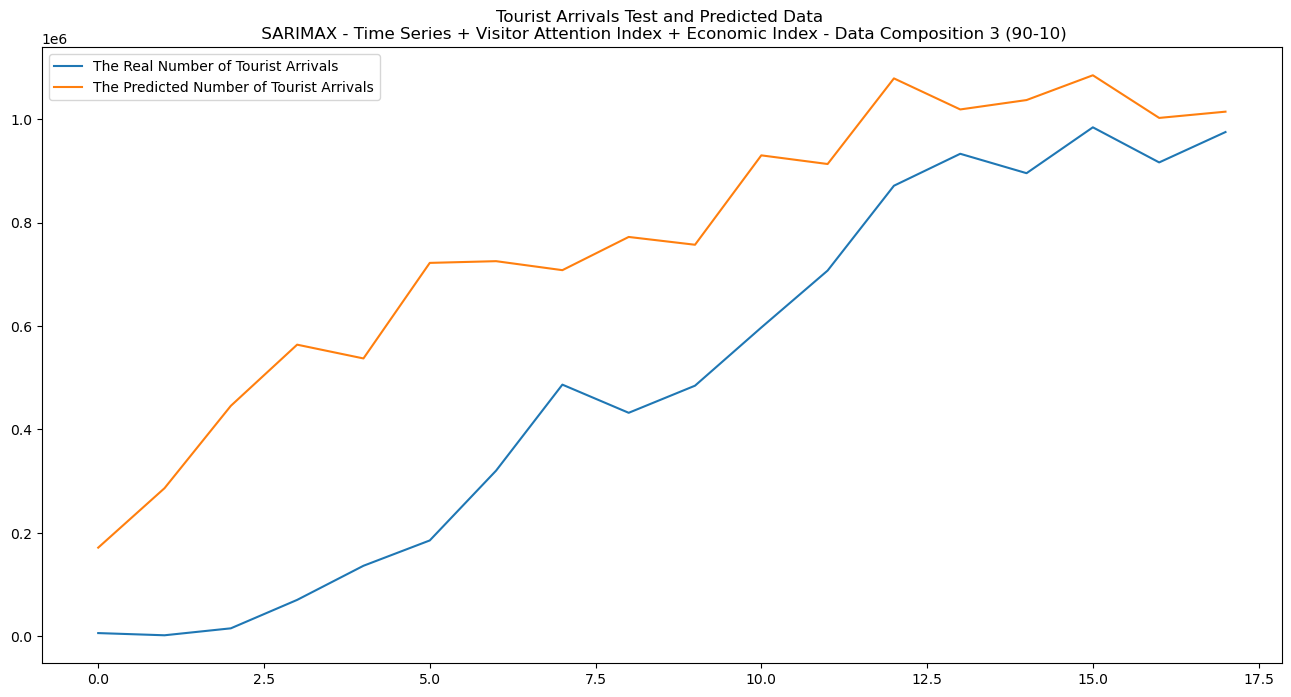

In [13]:
x_ax = range(len(test))
plt.plot(x_ax, test, label="The Real Number of Tourist Arrivals")
plt.plot(x_ax, y_pred, label="The Predicted Number of Tourist Arrivals")
plt.title("Tourist Arrivals Test and Predicted Data \n SARIMAX - Time Series + Visitor Attention Index + Economic Index - Data Composition 3 (90-10)")
plt.legend()
plt.show()